In [4]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

# Realidade Aumentada
O objetivo deste trabalho é detectar e localizar alvos nos quadros (frames) de um vídeo e inserir na cena objetos tridimensionais acima de cada alvo detectado. Para este trabalho, o objeto tridimensional será um cubo tridimensional e um modelo 3D (o Pikachu). Para isso, o trabalho será divido nas seguintes etapas:

1. Estimativa dos parâmetros intrínsecos da câmera
2. Detecção do alvo nos frames do vídeo
    * Transformar no espaço de cores em cinza
    * Aplicar redução de ruído
    * Binarizar a imagem
    * Encontrar os contornos
    * Filtrar contornos

## Estimativa dos parâmetros intrísecos da câmera
Para realizar essa etapa, será utilizado o Octave. Primeiramente, adicionamos o toolbox de camera calibration no Octave com o comando
```bash
addpath("<path>/<to>/<toolbox>/<parent_folder>/camera_calibration_toolbox_octave-master")
```
Então, navegamos para a pasta onde estão as imagens que queremos utilizar para a calibração de câmera. No nosso caso, são os frames do vídeo de entrada. Foram utilizados 10 frames para realizar a calibração. Após carregadas as imagens, extraimos as quinas utilizando a ferramenta visual do toolbox. Feito isso, o toolbox já possui todos os parametros necessários para realizar a calibração. Obtemos, então, os seguintes resultados:


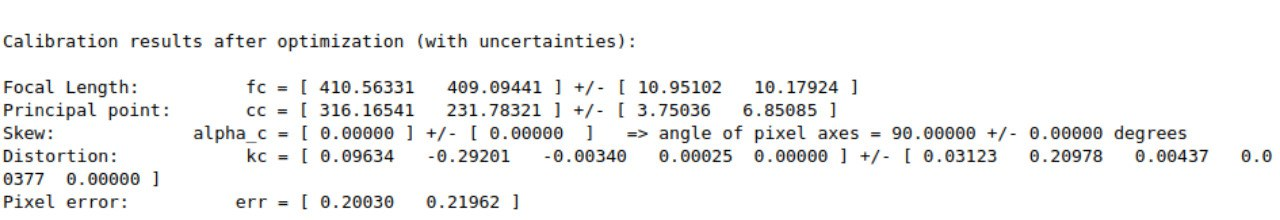

In [3]:
img = Image.open("./results/intrisics.jpeg")
img

## Detecção dos Alvos nos Frames do vídeo


In [50]:
def binarize_img(img):
    gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    b_filter = cv2.bilateralFilter(gray_scale, 9, 50, 50, cv2.BORDER_DEFAULT)
    canny = cv2.Canny(b_filter, 30, 200)
    _, binarized = cv2.threshold(canny, 127, 255, cv2.THRESH_BINARY)
    return binarized

In [51]:
def find_contours(binary_img):
    contours, _ = cv2.findContours(image=binary_img, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    return contours

In [88]:
def filter_contours(contours):
    MIN_AREA = 1000
    MAX_AREA = 10000
    filtered = []
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        contour = cv2.approxPolyDP(contour, perimeter*0.03, True)
        if (len(contour) == 4 and cv2.isContourConvex(contour) and cv2.contourArea(contour) > MIN_AREA and cv2.contourArea(contour) < MAX_AREA):
            filtered.append(contour)
        
    return filtered

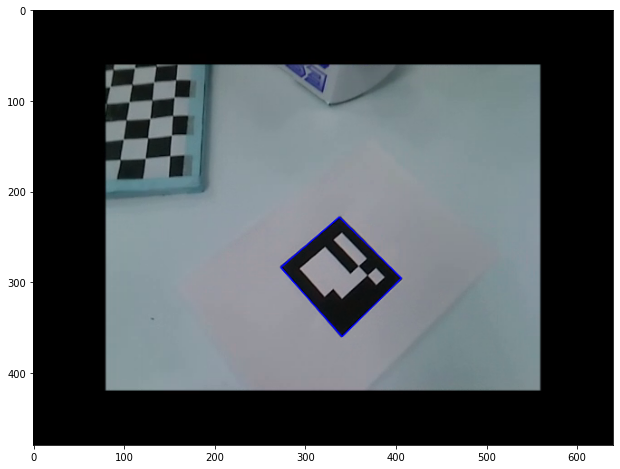

In [89]:
video = cv2.VideoCapture('./utils/entrada.mp4')
ok, nxt_frame = video.read()

for i in range(0,1050):
    ok, nxt_frame = video.read()

bin = binarize_img(nxt_frame)
contours = find_contours(bin)
contours = filter_contours(contours)


cnt_image = cv2.drawContours(image=nxt_frame, contours=contours, contourIdx=-1, color=(0, 0, 255), thickness=1, lineType=cv2.LINE_AA)


plt.subplots(figsize=(15, 8))
plt.imshow(cnt_image, cmap='gray')
